# Data Preprocessing UCI 303

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('CleavelandHeartUCI.csv')

dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## Dataset Details

In [3]:
dataset.shape

(303, 14)

In [4]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [6]:
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
target        int64
dtype: object

In [7]:
dataset.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  target  
0        3  0.0   6.0  

In [8]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [9]:
dataset.values.any()

True

## Remove Missing Data

In [10]:
dataset.dropna(inplace=True)

In [11]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [13]:
data = dataset.copy()

In [14]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [15]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
## For Chi Test
X1 = data.iloc[:,0:13] #independent columns
y1 = data.iloc[:,-1] #target column

##  Independent and Dependent Variables

In [17]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

### Independent variables (also referred to as Features) are the input for a process that is being analyzes

In [18]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0


### Dependent variables are the output of the process.

In [19]:
y

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: target, Length: 297, dtype: int64

### Objective 1 Achieved the objective to identify the significant features based on scores from both methods.

## Filter Based Feature Selections with Chi-Test

In [20]:
#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X1,y1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
print(featureScores.nlargest(13,'Score')) #print best features

       Specs       Score
7    thalach  187.053104
11        ca   82.730613
9    oldpeak   68.570533
12      thal   65.221093
8      exang   35.508090
0        age   22.917697
4       chol   20.855084
3   trestbps   16.707463
2         cp   14.591587
6    restecg    8.134652
10     slope    7.828836
1        sex    7.444195
5        fbs    0.002547


In [21]:
featureScores

,Specs,Score
0,age,22.917697
1,sex,7.444195
2,cp,14.591587
3,trestbps,16.707463
4,chol,20.855084
5,fbs,0.002547
6,restecg,8.134652
7,thalach,187.053104
8,exang,35.508090
9,oldpeak,68.570533


In [22]:
##featureScores.to_csv("FS-CHI.csv")

Text(0, 0.5, 'Scores')

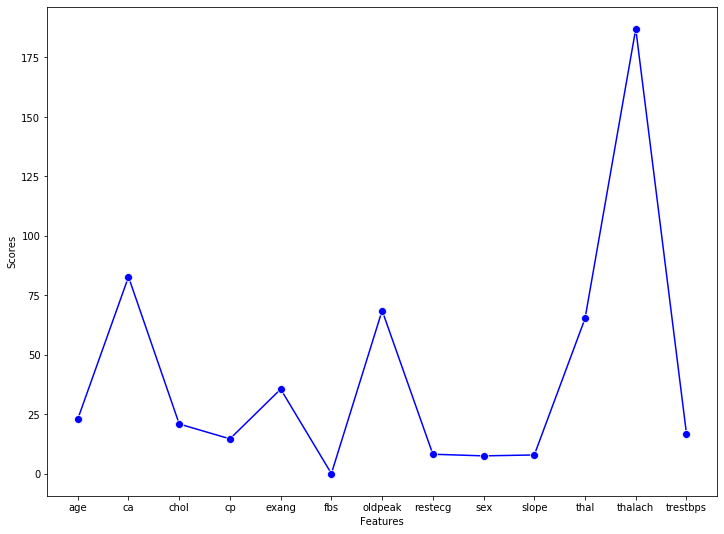

In [23]:
# line plot with x and y values defined
import matplotlib.pyplot as plt
#featureScores.plot.line(x="Featrues",y=" Scores", title="Chi-Square Score Test")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig, axes = plt.subplots(figsize=(12, 9))
#featureScores.plot(x='Specs',y='Score',title="Chi-Square Score Test",color='blue',marker='o',markerfacecolor='blue', markersize=8,linewidth=1.5,scale_factor = '5')
p=sns.lineplot(x='Specs',y= 'Score',color='blue',marker='o',markersize=8,ax=axes,data=featureScores)

p.set_xlabel("Features", fontsize = 10)
p.set_ylabel("Scores", fontsize = 10)


## Objective 2 Hyper parameter tuning with SVM with FS 11 Atttrtibutes of CHI

### Achieved the objective to find the best hyper parameter tuning for classification model 

## Feature Importance ranking based on KNN ;Remove age and thal  

In [24]:
import random
random.seed(101)
y = data['target'].copy()
x = data.drop(['target','age','thal'], axis=1).copy()
y

xpy=x
ypy=y

### 11 Atttributes chosen for the model evaluation

In [25]:
x

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,1,1,145,233,1,2,150,0,2.3,3,0.0
1,1,4,160,286,0,2,108,1,1.5,2,3.0
2,1,4,120,229,0,2,129,1,2.6,2,2.0
3,1,3,130,250,0,0,187,0,3.5,3,0.0
4,0,2,130,204,0,2,172,0,1.4,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
297,0,4,140,241,0,0,123,1,0.2,2,0.0
298,1,1,110,264,0,0,132,0,1.2,2,0.0
299,1,4,144,193,1,0,141,0,3.4,2,2.0
300,1,4,130,131,0,0,115,1,1.2,2,1.0


In [26]:
x = np.array(x, dtype='float32')

In [27]:
y = np.array(y, dtype='float32')

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_scaler = StandardScaler()

In [29]:
import random
random.seed(101)
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(x,y, test_size=0.2, random_state=101)

trainX=std_scaler.fit_transform(trainX)
testX=std_scaler.transform(testX)

In [30]:
trainX

array([[ 0.66057825,  0.8494212 ,  0.1900167 , ...,  1.5166093 ,
         0.66557413,  0.329969  ],
       [ 0.66057825, -2.2797935 ,  0.90136725, ..., -0.21644954,
        -0.9440286 ,  1.4012382 ],
       [-1.5138252 , -0.19365042,  1.1202443 , ..., -0.90967315,
        -0.9440286 ,  0.329969  ],
       ...,
       [-1.5138252 ,  0.8494212 ,  0.3541745 , ..., -0.90967315,
        -0.9440286 , -0.74130017],
       [-1.5138252 , -0.19365042,  0.1900167 , ..., -0.90967315,
        -0.9440286 , -0.74130017],
       [-1.5138252 , -1.236722  ,  0.46361306, ...,  0.21681513,
         0.66557413, -0.74130017]], dtype=float32)

In [31]:
trainY

array([1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 0.

In [32]:
QC = pd.DataFrame(trainX)

In [33]:
QC

,0,1,2,3,4,5,6,7,8,9,10
0,0.660578,0.849421,0.190017,0.115956,-0.402200,1.040962,-0.931131,-0.720577,1.516609,0.665574,0.329969
1,0.660578,-2.279794,0.901367,-0.075954,-0.402200,1.040962,1.227814,-0.720577,-0.216450,-0.944029,1.401238
2,-1.513825,-0.193650,1.120244,0.557349,-0.402200,-0.972980,0.973821,-0.720577,-0.909673,-0.944029,0.329969
3,-1.513825,0.849421,1.010806,-0.075954,-0.402200,-0.972980,0.211840,1.387777,0.303468,0.665574,-0.741300
4,-1.513825,-0.193650,-0.630772,-0.632494,-0.402200,-0.972980,0.889156,-0.720577,-0.909673,-0.944029,-0.741300
...,...,...,...,...,...,...,...,...,...,...,...
232,-1.513825,0.849421,1.010806,-0.440584,-0.402200,1.040962,-1.481450,-0.720577,-0.043144,0.665574,2.472507
233,-1.513825,-0.193650,1.557998,2.150204,-0.402200,1.040962,0.084843,-0.720577,-0.216450,-0.944029,-0.741300
234,-1.513825,0.849421,0.354174,-0.267864,-0.402200,1.040962,0.465833,-0.720577,-0.909673,-0.944029,-0.741300
235,-1.513825,-0.193650,0.190017,1.075507,2.486326,-0.972980,0.889156,-0.720577,-0.909673,-0.944029,-0.741300


In [34]:
testX

array([[-1.5138252e+00, -1.9365042e-01,  4.6361306e-01, -9.7793216e-01,
        -4.0219983e-01,  3.3990581e-02, -1.3967859e+00, -7.2057664e-01,
         4.3509305e-02,  6.6557413e-01, -7.4130017e-01],
       [ 6.6057825e-01, -2.2797935e+00,  1.3529743e-01, -8.4359503e-01,
        -4.0219983e-01, -9.7298044e-01,  5.5049795e-01, -7.2057664e-01,
        -2.1644954e-01, -9.4402862e-01,  1.4012382e+00],
       [ 6.6057825e-01, -1.9365042e-01,  4.6361306e-01,  1.1595585e-01,
        -4.0219983e-01,  1.0409616e+00, -1.2681815e-01, -7.2057664e-01,
         8.2338578e-01,  6.6557413e-01,  2.4725072e+00],
       [-1.5138252e+00,  8.4942120e-01, -1.0685265e+00, -1.8991011e+00,
        -4.0219983e-01, -9.7298044e-01, -1.0157956e+00, -7.2057664e-01,
         4.7677404e-01,  6.6557413e-01, -7.4130017e-01],
       [-1.5138252e+00, -1.2367220e+00,  1.9001670e-01,  3.9191786e-02,
        -4.0219983e-01,  1.0409616e+00,  5.0816566e-01, -7.2057664e-01,
         3.0346808e-01,  6.6557413e-01, -7.4130017e-

# KNN Classifiers with Grid Search methodology

In [35]:
KNtrainX=trainX
KNtestX=testX
KNtrainY=trainY
KNtestY=testY

In [36]:
KNtrainX=std_scaler.fit_transform(KNtrainX)
KNtestX=std_scaler.transform(KNtestX)

In [37]:
KNtrainX

array([[ 0.66057825,  0.8494212 ,  0.1900167 , ...,  1.5166093 ,
         0.66557413,  0.329969  ],
       [ 0.66057825, -2.2797935 ,  0.90136725, ..., -0.21644953,
        -0.9440286 ,  1.4012382 ],
       [-1.5138252 , -0.19365045,  1.1202443 , ..., -0.90967315,
        -0.9440286 ,  0.329969  ],
       ...,
       [-1.5138252 ,  0.8494212 ,  0.3541745 , ..., -0.90967315,
        -0.9440286 , -0.74130017],
       [-1.5138252 , -0.19365045,  0.1900167 , ..., -0.90967315,
        -0.9440286 , -0.74130017],
       [-1.5138252 , -1.236722  ,  0.46361306, ...,  0.21681514,
         0.66557413, -0.74130017]], dtype=float32)

### Define KNN Model

In [38]:
from sklearn.neighbors import KNeighborsClassifier
import random
random.seed(101)
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

## Updated Parameters with Range Given to see the range

In [39]:
KNparameters1 = {
    'n_neighbors' :[1,8,21],
    'weights' :['uniform'], 'p':(2,4)
   }

In [40]:
KNmodel = KNeighborsClassifier()
clf = GridSearchCV(KNmodel, KNparameters1, verbose=2 ,cv=10)

In [41]:
clf.fit(KNtrainX, KNtrainY)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=4, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=4, wei

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 8, 21], 'p': (2, 4),
                         'weights': ['uniform']},
             verbose=2)

### Define the best KNN paramters from Grid Search

In [42]:
KN_best_param = clf.best_params_
print("Best params for KNN:", KN_best_param)

Best params for KNN: {'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}


In [43]:
knnpredict = clf.predict(KNtestX)
print(classification_report(KNtestY,knnpredict))
print(confusion_matrix(KNtestY, knnpredict))

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88        40
         1.0       0.78      0.70      0.74        20

    accuracy                           0.83        60
   macro avg       0.82      0.80      0.81        60
weighted avg       0.83      0.83      0.83        60

[[36  4]
 [ 6 14]]


In [44]:
KN_accuracy_score = accuracy_score(testY, knnpredict)
print("Best accuracy for KNN:", KN_accuracy_score)

Best accuracy for KNN: 0.8333333333333334


## Feature Importance ranking based on KNN Top 9  ;Remove age,thal,sex and chol

In [45]:
import random
random.seed(101)
y = data['target'].copy()
x = data.drop(['target','age','thal','sex','chol'], axis=1).copy()
y

xpy=x
ypy=y

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_scaler = StandardScaler()

In [47]:
import random
random.seed(101)
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(x,y, test_size=0.2, random_state=101)

trainX=std_scaler.fit_transform(trainX)
testX=std_scaler.transform(testX)

In [48]:
QC = pd.DataFrame(trainX)

In [49]:
KNtrainX=trainX
KNtestX=testX
KNtrainY=trainY
KNtestY=testY

In [50]:
KNparameters1 = {
    'n_neighbors' :[3,6,15,21,26,28],
    'weights' :['uniform', 'distance'], 'p':(1,2,3,4,5)
   }

In [51]:
KNmodel = KNeighborsClassifier()
clf = GridSearchCV(KNmodel, KNparameters1, verbose=2 ,cv=10)

In [52]:
clf.fit(KNtrainX, KNtrainY)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=3, p=1, we

[CV] END ................n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_ne

[CV] END ..............n_neighbors=15, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=15, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=15, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=15, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=15, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=15, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=15, p=3, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=15, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=15, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=15, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=15, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=15, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_ne

[CV] END ..............n_neighbors=21, p=4, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=21, p=4, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=21, p=4, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=21, p=4, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=21, p=4, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=21, p=5, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=21, p=5, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=21, p=5, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=21, p=5, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=21, p=5, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=21, p=5, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=21, p=5, weights=uniform; total time=   0.0s
[CV] END ...............n_ne

[CV] END ..............n_neighbors=26, p=5, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=26, p=5, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=26, p=5, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=26, p=5, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=28, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_ne

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 6, 15, 21, 26, 28],
                         'p': (1, 2, 3, 4, 5),
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [53]:
KN_best_param9 = clf.best_params_
print("Best params for KNN:", KN_best_param9)

Best params for KNN: {'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}


In [54]:
knnpredict = clf.predict(KNtestX)
print(classification_report(KNtestY,knnpredict))
print(confusion_matrix(KNtestY, knnpredict))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        40
           1       0.70      0.70      0.70        20

    accuracy                           0.80        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.80      0.80      0.80        60

[[34  6]
 [ 6 14]]


In [55]:
KN_accuracy_score = accuracy_score(testY, knnpredict)
print("Best accuracy for KNN9:", KN_accuracy_score)

Best accuracy for KNN9: 0.8


## Feature Importance ranking based on KNN Top 7 ;Remove age,thal,sex and chol,oldpeak,ca

In [56]:
import random
random.seed(101)
y = data['target'].copy()
x = data.drop(['target','age','thal','sex','chol','oldpeak','ca'], axis=1).copy()
y

xpy=x
ypy=y

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_scaler = StandardScaler()

In [58]:
import random
random.seed(101)
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(x,y, test_size=0.2, random_state=101)

trainX=std_scaler.fit_transform(trainX)
testX=std_scaler.transform(testX)

In [59]:
QC = pd.DataFrame(trainX)

In [60]:
KNtrainX=trainX
KNtestX=testX
KNtrainY=trainY
KNtestY=testY

In [61]:
KNparameters1 = {
    'n_neighbors' :[3,11,12,13],
    'weights' :['uniform', 'distance'], 'p':(1,2,3,4,5)
   }

In [62]:
KNmodel = KNeighborsClassifier()
clf = GridSearchCV(KNmodel, KNparameters1, verbose=2 ,cv=10)

In [63]:
clf.fit(KNtrainX, KNtrainY)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=3, p=1, we

[CV] END ..............n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=11, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=11, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_ne

[CV] END ...............n_neighbors=12, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=12, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=12, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=12, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=12, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=12, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=12, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=12, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=12, p=4, weights=uniform; total time=   0.0s
[CV] END ..............n_neighbors=12, p=4, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=12, p=4, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=12, p=4, weights=distance; total time=   0.0s
[CV] END ..............n_nei

[CV] END ..............n_neighbors=13, p=5, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=13, p=5, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=13, p=5, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=13, p=5, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=13, p=5, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=13, p=5, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=13, p=5, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=13, p=5, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=13, p=5, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=13, p=5, weights=distance; total time=   0.0s


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 11, 12, 13], 'p': (1, 2, 3, 4, 5),
                         'weights': ['uniform', 'distance']},
             verbose=2)

### Define the best KNN paramters from Grid Search

In [64]:
KN_best_param7 = clf.best_params_
print("Best params for KNN7:", KN_best_param7)

Best params for KNN7: {'n_neighbors': 13, 'p': 2, 'weights': 'uniform'}


In [65]:
knnpredict = clf.predict(KNtestX)
print(classification_report(KNtestY,knnpredict))
print(confusion_matrix(KNtestY, knnpredict))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        40
           1       0.58      0.70      0.64        20

    accuracy                           0.73        60
   macro avg       0.71      0.72      0.71        60
weighted avg       0.75      0.73      0.74        60

[[30 10]
 [ 6 14]]


In [66]:
KN_accuracy_score = accuracy_score(testY, knnpredict)
print("Best accuracy for KNN7:", KN_accuracy_score)

Best accuracy for KNN7: 0.7333333333333333
